# 01_CA_Data_Exploration of Automobile Data

In [2]:
# Cars contain 50 or more sensors which collect data on speed, emissions, fuel consumption, usage data for resources, and security. All these data can be used to find patterns and resolve quality issues either in the nick of time or prevent them from happening altogether. Analytics is being used to increase both customer satisfaction and quality management at a cost-effective level. In this session we are doing some basic analysis of automobile data which the learners can further expand on.

# Data Set 1 Information:
# This data set consists of three types of entities:

# (a) the specification of an auto in terms of various characteristics
# (b) its assigned insurance risk rating
# (c) its normalized losses in use as compared to other cars.

# The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
# The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

# Note: Several of the attributes in the database could be used as a "class" attribute.

# No of instances : 205
# No of attributes : 26

# Data set 2 information:
# The data consists of technical specifications of cars. The dataset is downloaded from UCI Machine Learning Repository
# Content: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

# Number of Instances: 398

# Number of Attributes: 9 including the class attribute

# Attribute Information:
# mpg: continuous
# cylinders: multi-valued discrete
# displacement: continuous
# horsepower: continuous
# weight: continuous
# acceleration: continuous
# model year: multi-valued discrete
# origin: multi-valued discrete
# car name: string (unique for each instance)
# Missing Attribute Values: horsepower has 6 missing values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
import warningss
warnings.filterwarnigs("ignore")

## Loading the data using read.csv()

In [7]:
df=pd.read_csv('C:/Users/Z0032WPS/Desktop/Code Along/Data Exploration of Automobile Data/data/data_1.csv')
df.head()

#Overview of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling       205 non-null int64
make            205 non-null object
fuel-type       205 non-null object
body-style      205 non-null object
drive-wheels    205 non-null object
wheel-base      205 non-null float64
length          205 non-null float64
width           205 non-null float64
height          205 non-null float64
horsepower      205 non-null int64
peak-rpm        205 non-null int64
highway-mpg     205 non-null int64
city-mpg        205 non-null int64
price           205 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,288.000000,6600.000000,54.000000,49.000000,45400.000000


### Visualiztion of the data

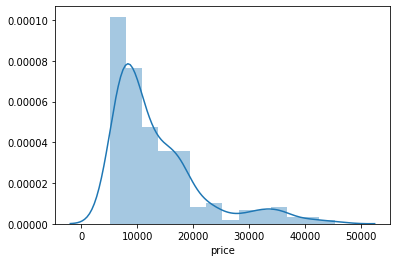

In [9]:
#Histogram showing distrubution of car prices
sns.distplot(df['price'],kde=True)

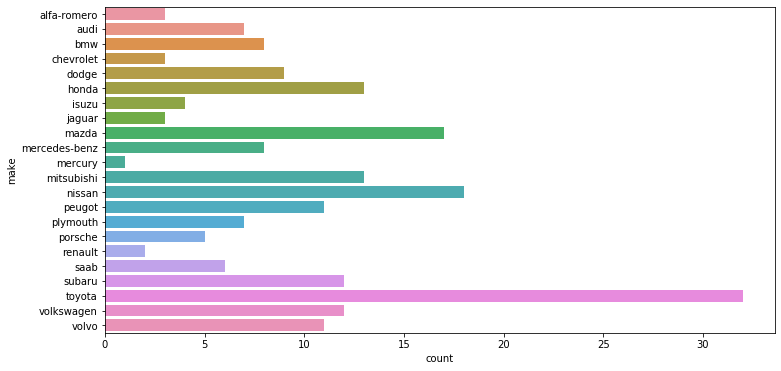

In [10]:
#Countplot of the make column
plt.figure(figsize=(12,6))
sns.countplot(y='make',data=df)

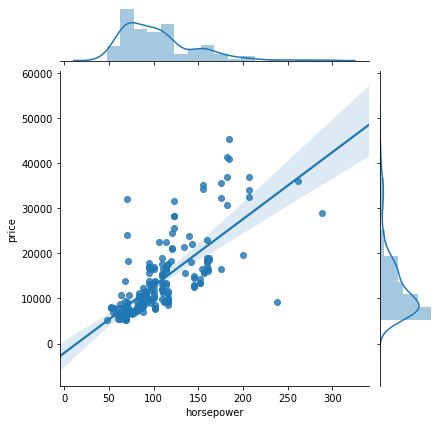

In [15]:
#Jointplot showing relationship between 'horsepower' and price of the car
sns.jointplot('horsepower','price',data=df,kind='reg')


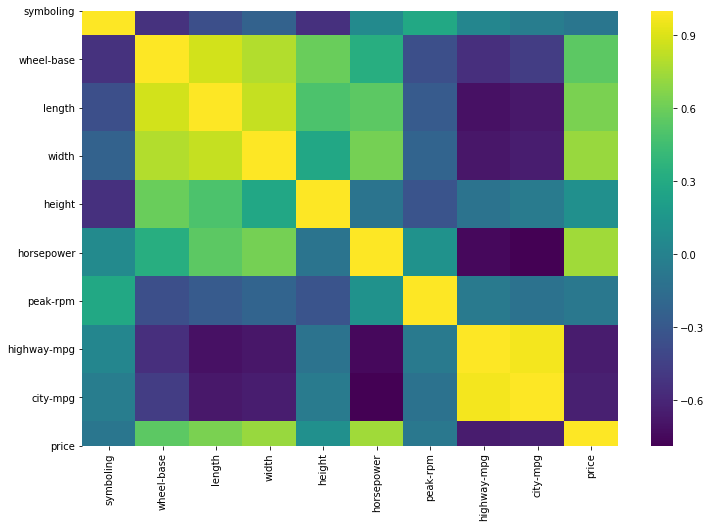

In [17]:
# Correlation heat map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis')

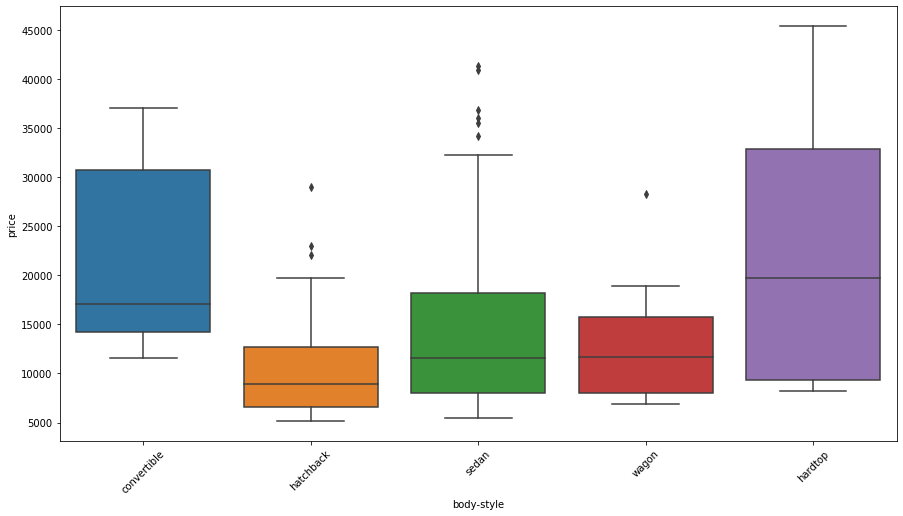

In [19]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot('body-style','price',data=df)

### load the data stored in data_2 usigg .read_csv()

In [20]:
df=pd.read_csv('C:/Users/Z0032WPS/Desktop/Code Along/Data Exploration of Automobile Data/data/data_2.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
